## Basins of attraction

The previous examples show that depending on the initial guess, we may arrive at different roots! These are the so-called *basins of attraction* for each root. Newton's method *jumps* around the parameter space, and the increase in residual corresponds to a jump across a basin. This can lead to tempermental (but beautiful) behaviour.

### Tempermental but beautiful behaviour

The Newton-Raphson method naturally can handle complex numbers of the form $x + y i$.

#### Example: $x^3-x$

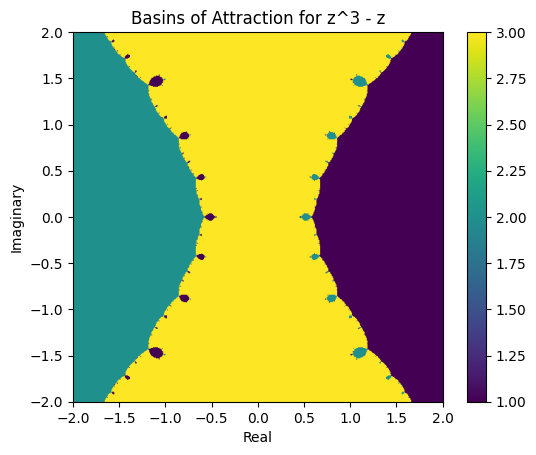

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(z):
  return z**3 - z

def df(z):
  return 3 * z**2 - 1

# Create a grid of complex numbers
real_range = (-2, 2)
imag_range = (-2, 2)
grid_size = 500
real_values = np.linspace(real_range[0], real_range[1], grid_size)
imag_values = np.linspace(imag_range[0], imag_range[1], grid_size)
z_grid = np.array([[complex(r, i) for r in real_values] for i in imag_values])

# Apply Newton-Raphson to each point in the grid
#roots = np.array([[newton(f, z, fprime=df) for z in row] for row in z_grid])
roots = newton(f, z_grid, fprime=df)

# Assign colors based on the root found
colors = np.zeros((grid_size, grid_size))
for i in range(grid_size):
  for j in range(grid_size):
    if roots[i, j] is None:
      colors[i, j] = 0
    elif abs(roots[i, j] - 1) < 0.5:
      colors[i, j] = 1
    elif abs(roots[i, j] - (-1)) < 0.5:
      colors[i, j] = 2
    elif abs(roots[i, j] - 0) < 0.5:
      colors[i, j] = 3
    else:
      colors[i, j] = 0  # Assign a default color


# Plot the basins of attraction
plt.imshow(colors, extent=[real_range[0], real_range[1], imag_range[0], imag_range[1]], origin='lower', cmap='viridis')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Basins of Attraction for z^3 - z')
plt.colorbar()
plt.show()


#### Example: $x^3-1$

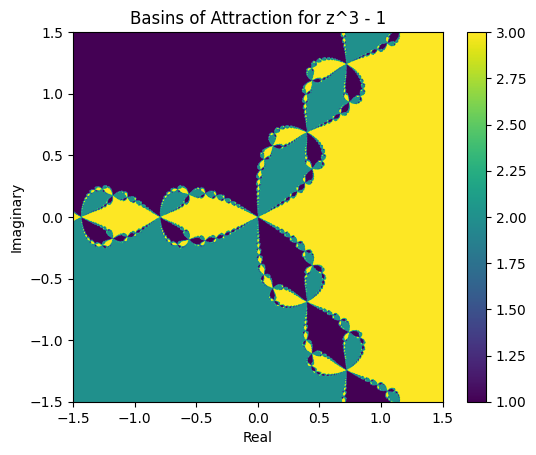

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(z):
  return z**3 - 1

def df(z):
  return 3 * z**2

# Create a grid of complex numbers
real_range = (-1.5, 1.5)
imag_range = (-1.5, 1.5)
grid_size = 1000
real_values = np.linspace(real_range[0], real_range[1], grid_size)
imag_values = np.linspace(imag_range[0], imag_range[1], grid_size)
z_grid = np.array([[complex(r, i) for r in real_values] for i in imag_values])

# Apply Newton-Raphson to each point in the grid
#roots = np.array([[newton(f, z, fprime=df) for z in row] for row in z_grid])
roots = newton(f, z_grid, fprime=df)

# Assign colors based on the root found
th = 1e-3
rs = np.roots([1,0,0,-1])
colors = np.zeros((grid_size, grid_size))
for i in range(grid_size):
  for j in range(grid_size):
    if roots[i, j] is None:
      colors[i, j] = 0
    elif abs(roots[i, j] - rs[0]) < th:
      colors[i, j] = 1
    elif abs(roots[i, j] - rs[1]) < th:
      colors[i, j] = 2
    elif abs(roots[i, j] - rs[2]) < th:
      colors[i, j] = 3
    else:
      colors[i, j] = 0  # Assign a default color


# Plot the basins of attraction
plt.imshow(colors, extent=[real_range[0], real_range[1], imag_range[0], imag_range[1]], origin='lower', cmap='viridis')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Basins of Attraction for z^3 - 1')
plt.colorbar()
plt.show()

Beautiful, but like most beautiful things... often problematic... It implies small changes in initial guesses can find dramatically different roots, and numerical methods are prone to 'small changes' due to roundoff error...